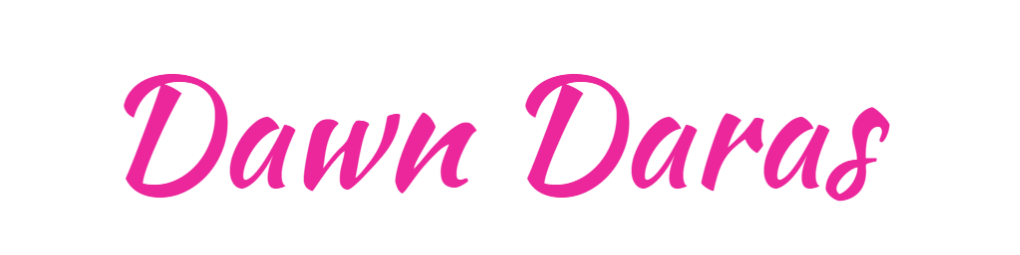

###**From EDAS to Linear Regression using R on Google Colab**

####We will be using a native R dataset, through exploratory data analysis (EDA') all the way through a simple linear regression.  
####We will talk about all the assumptions that go into a linear regression model.

#####*The same code can be run in any R environment*

###**First connect your runtime environment on the top right**###


##Data Prep for the State Dataset, which comes with R
###This combines three datasets state.abb, state.x77, and state.region
###Here I combine them into one dataset "States" in preparation for the EDAs portion of this demonstration

###These are the descriptions of the datasets:
####**state.abb**: A vector with 2-letter abbreviations for the state names
####**state.x77**: A matrix with 50 rows and 8 columns giving the following statistics - *Population, Income, Illiteracy, Life Exp, Murder, HS Grad, Frost, and Areas*
####**state.region** Divides states into regions *Northeast, South, North Central, West*
#####To read more about these datasets, you can run the following code: **help(dataset)** or this link [CRAN States](https://cran.r-project.org/web/packages/states/states.pdf)

In [1]:
tem <-data.frame(state.x77)  #bringing in state.x77 as a dataframe
states <-cbind(state.abb, tem, state.region) #Combine all three data sets into a dataframe

In [2]:
#Rename the first and 10th column
colnames(states)[1] <- "State"               # Rename first column
colnames(states)[10] <- "Region"              # Rename the 10th column
head(states, 5)

,State,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Region
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Alabama,AL,3615,3624,2.1,69.05,15.1,41.3,20,50708,South
Alaska,AK,365,6315,1.5,69.31,11.3,66.7,152,566432,West
Arizona,AZ,2212,4530,1.8,70.55,7.8,58.1,15,113417,West
Arkansas,AR,2110,3378,1.9,70.66,10.1,39.9,65,51945,South
California,CA,21198,5114,1.1,71.71,10.3,62.6,20,156361,West


In [3]:
str(states)  # structure of data object, data types for each column
#as well as data types - this will be important as we proceed

'data.frame':	50 obs. of  10 variables:
 $ State     : chr  "AL" "AK" "AZ" "AR" ...
 $ Population: num  3615 365 2212 2110 21198 ...
 $ Income    : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy: num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp  : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder    : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad   : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost     : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area      : num  50708 566432 113417 51945 156361 ...
 $ Region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...


###We will start by examining the distributions of the different variables, particularly for normality. If they meet the assumption of normality, then some methods, such as linear regression are appropriate.  
#### Normality is defined where the variable is distributed in a "normal curve" or bell shaped curve. The mean, median and mode (measures of central tendency) fall approximately at the same point. + and - 1 standard deviations (SD's) around the mean are 68.27% of the observations, Within +/- 2SD's around the mean, 95.45% of observations, and 99.73% of observations are contained within +/- 3 SD's from the mean.
####In a normal curve, half of the observations fall below the mean, and half fall above.

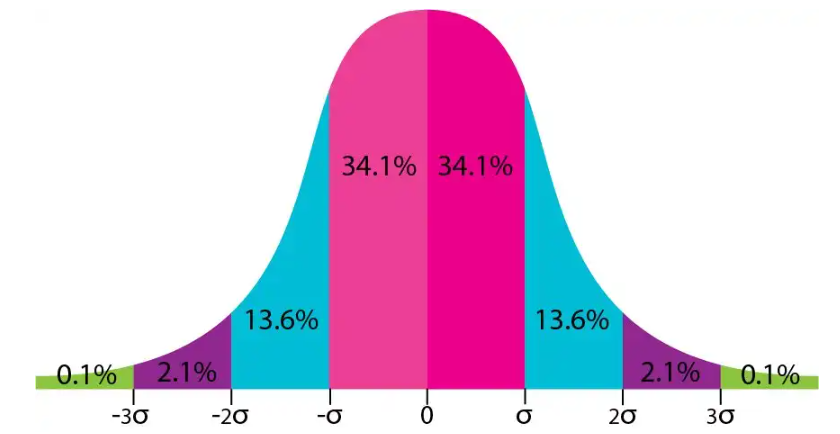

In [4]:
#Lets look at the summary statistics - and the distributions of the variables of states
summary(states)

    State             Population        Income       Illiteracy   
 Length:50          Min.   :  365   Min.   :3098   Min.   :0.500  
 Class :character   1st Qu.: 1080   1st Qu.:3993   1st Qu.:0.625  
 Mode  :character   Median : 2838   Median :4519   Median :0.950  
                    Mean   : 4246   Mean   :4436   Mean   :1.170  
                    3rd Qu.: 4968   3rd Qu.:4814   3rd Qu.:1.575  
                    Max.   :21198   Max.   :6315   Max.   :2.800  
    Life.Exp         Murder          HS.Grad          Frost       
 Min.   :67.96   Min.   : 1.400   Min.   :37.80   Min.   :  0.00  
 1st Qu.:70.12   1st Qu.: 4.350   1st Qu.:48.05   1st Qu.: 66.25  
 Median :70.67   Median : 6.850   Median :53.25   Median :114.50  
 Mean   :70.88   Mean   : 7.378   Mean   :53.11   Mean   :104.46  
 3rd Qu.:71.89   3rd Qu.:10.675   3rd Qu.:59.15   3rd Qu.:139.75  
 Max.   :73.60   Max.   :15.100   Max.   :67.30   Max.   :188.00  
      Area                  Region  
 Min.   :  1049   Northea

####There are a few main ways of measuring "central tendency" of a variable - or how we describe data by the typical data point within the distribution of a variable. The most common are the mean, median , and mode
#####The mean of an observation variable is a numerical measure of the central location of the data values. It is the sum of its data values divided by data count.
#####The median of an observation variable is the value at the middle when the data is sorted in ascending order. It is an ordinal measure of the central location of the data values.
#####The mode is the value that has highest number of occurrences in a set of data. Unike mean and median, mode can have both numeric and character data.

#####R does not have a function to calculate the mode - or the most frequently occurring observation, which is also a measure of central tendency.  Here we will calculate it for a few of the numerical variables. Particularly as a demonstration.

In [5]:
#If you need to calculate the mode, here is a way to do it
# Create the function. First for population
getmode <- function(pop) {
   uniqv <- unique(pop)
   uniqv[which.max(tabulate(match(pop, uniqv)))]
}

# Create the vector with numbers.Calling the weight column into a vector
#with the cbind function
pop <-cbind(states$Population)

# Calculate the mode using the user function.
result <- getmode(pop)
print(result)

# Create the function.
getmode <- function(inc) {
   uniqv <- unique(inc)
   uniqv[which.max(tabulate(match(inc, uniqv)))]
}

# Create the vector with numbers.Calling the weight column into a vector
#with the cbind function
inc <-cbind(states$Murder)

# Calculate the mode using the user function.
result <- getmode(inc)
print(result)

[1] 3615
[1] 10.3


####So far we can see that Income, Illiteracy, Life Exp, and HS Grad, are likely to be normally distributed by looking at the Min/Max, and where the means are positioned.  
####Another way to tell is that the Mean and Median (and often Mode) are in the same position.
####This is not the case for Population - where the Mean and Median (and Mode) are different, and the majority of the observations are after the mean.  Also, with Murder, we can see that the Mean and the Median are closer to the Max, and the Mode is not close to either.
####We will look at this another way as well.

In essence we are looking to see if each variable is either normal or "skewed" , where the data points to the right or left of the mean. Sometimes when this happens, we need to apply changes to the data or choose another method altogether.



###Standard Deviation and Variance
####When we talk about Standard Deviation and Variance we are discussing how the observations are *spread* about the mean.

####Variance is derived by taking the mean of the data points (the central tendency), subtracting the mean from each data point individually, squaring each of these results (so as to remove the +/- to get a measure of distance from the mean), and then taking another mean of these squares.

####Standard deviation is the square root of the variance, or in essence, we have standardized the variance, to return it back to the same units of measure as the datset.

####Smaller standard deviations are where data is clustered more about the mean, while larger standard deviations are where the data is more spread out.

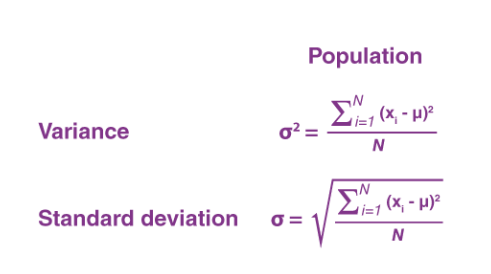

In [6]:
#Because we are calculating variance and standard deviation for several variables we will do it this way:
#We are including only variables which are numerical

#variance
lapply(states[, 2:7], var)

$Population
[1] 19931684

$Income
[1] 377573.3

$Illiteracy
[1] 0.3715306

$Life.Exp
[1] 1.80202

$Murder
[1] 13.62747

$HS.Grad
[1] 65.23789

In [7]:
#Standard Deviation
sdev <-lapply(states[, 2:7], sd)
print(sdev)

$Population
[1] 4464.491

$Income
[1] 614.4699

$Illiteracy
[1] 0.6095331

$Life.Exp
[1] 1.342394

$Murder
[1] 3.69154

$HS.Grad
[1] 8.076998



###Coefficient of Variation (CoV)
####The CoV is the ratio of the standard deviation to the mean and is calculated by: SD/Mean
####The higher the CV, the greater the dispersion of the data from the mean, or less likely to be normally distributed.

In [8]:
library (dplyr)

# Calculate clibraryoefficient of variation for all numeric columns in the dataframe
#Comparing each variable across region
#In the output we can see that North & West Regions have greatest variation for Population
#Northeast and Northcentral have highest variation for Murder

summary_df <- states %>% group_by(Region) %>%
  summarise(across(where(is.numeric), list(cv = ~sd(.)/mean(.) * 100)))
print(summary_df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 4 × 9
  Region  Population_cv Income_cv Illiteracy_cv Life.Exp_cv Murder_cv HS.Grad_cv
  <fct>           <dbl>     <dbl>         <dbl>       <dbl>     <dbl>      <dbl>
1 Northe…         111.      12.2           27.8        1.04      56.6       7.28
2 South            66.1     15.1           31.8        1.47      24.8      12.9 
3 North …          77.1      6.14          20.2        1.44      67.7       6.65
4 West            191.      14.1           59.5        1.90      37.1       5.65
# ℹ 2 more variables: Frost_cv <dbl>, Area_cv <dbl>


###Visualization & The Shapiro Wilk
####We are going to visualize our data and run a Shapiro-Wilk Test for normality.  We'll discuss the interpretation of this, as we go along.


##Plotting Quantiles - the QQ Plot
The first method for exploring normality of our variables is to plot quantiles, or a QQ Plot. This is a quick visual check. This is very easy in R. To explain what we are doing - Quantiles are basically your data, sorted in ascending order, then plotting them according to a theoretical normal distribution. Quantiles are values that split sorted data or a probability distribution into equal parts. In general terms, a q-quantile divides sorted data into q parts.  They become special when they're divided up into 4 parts, then they're ***quartiles***, into 10 parts, ***deciles***, and so forth.

So X is a theoretical quantile, and y is your sample quantile. The closer the plotted line is to the normal line, the more normal the data is distributed.

We will also be eyeballing the histograms for a normal density curve. Let's take a look...

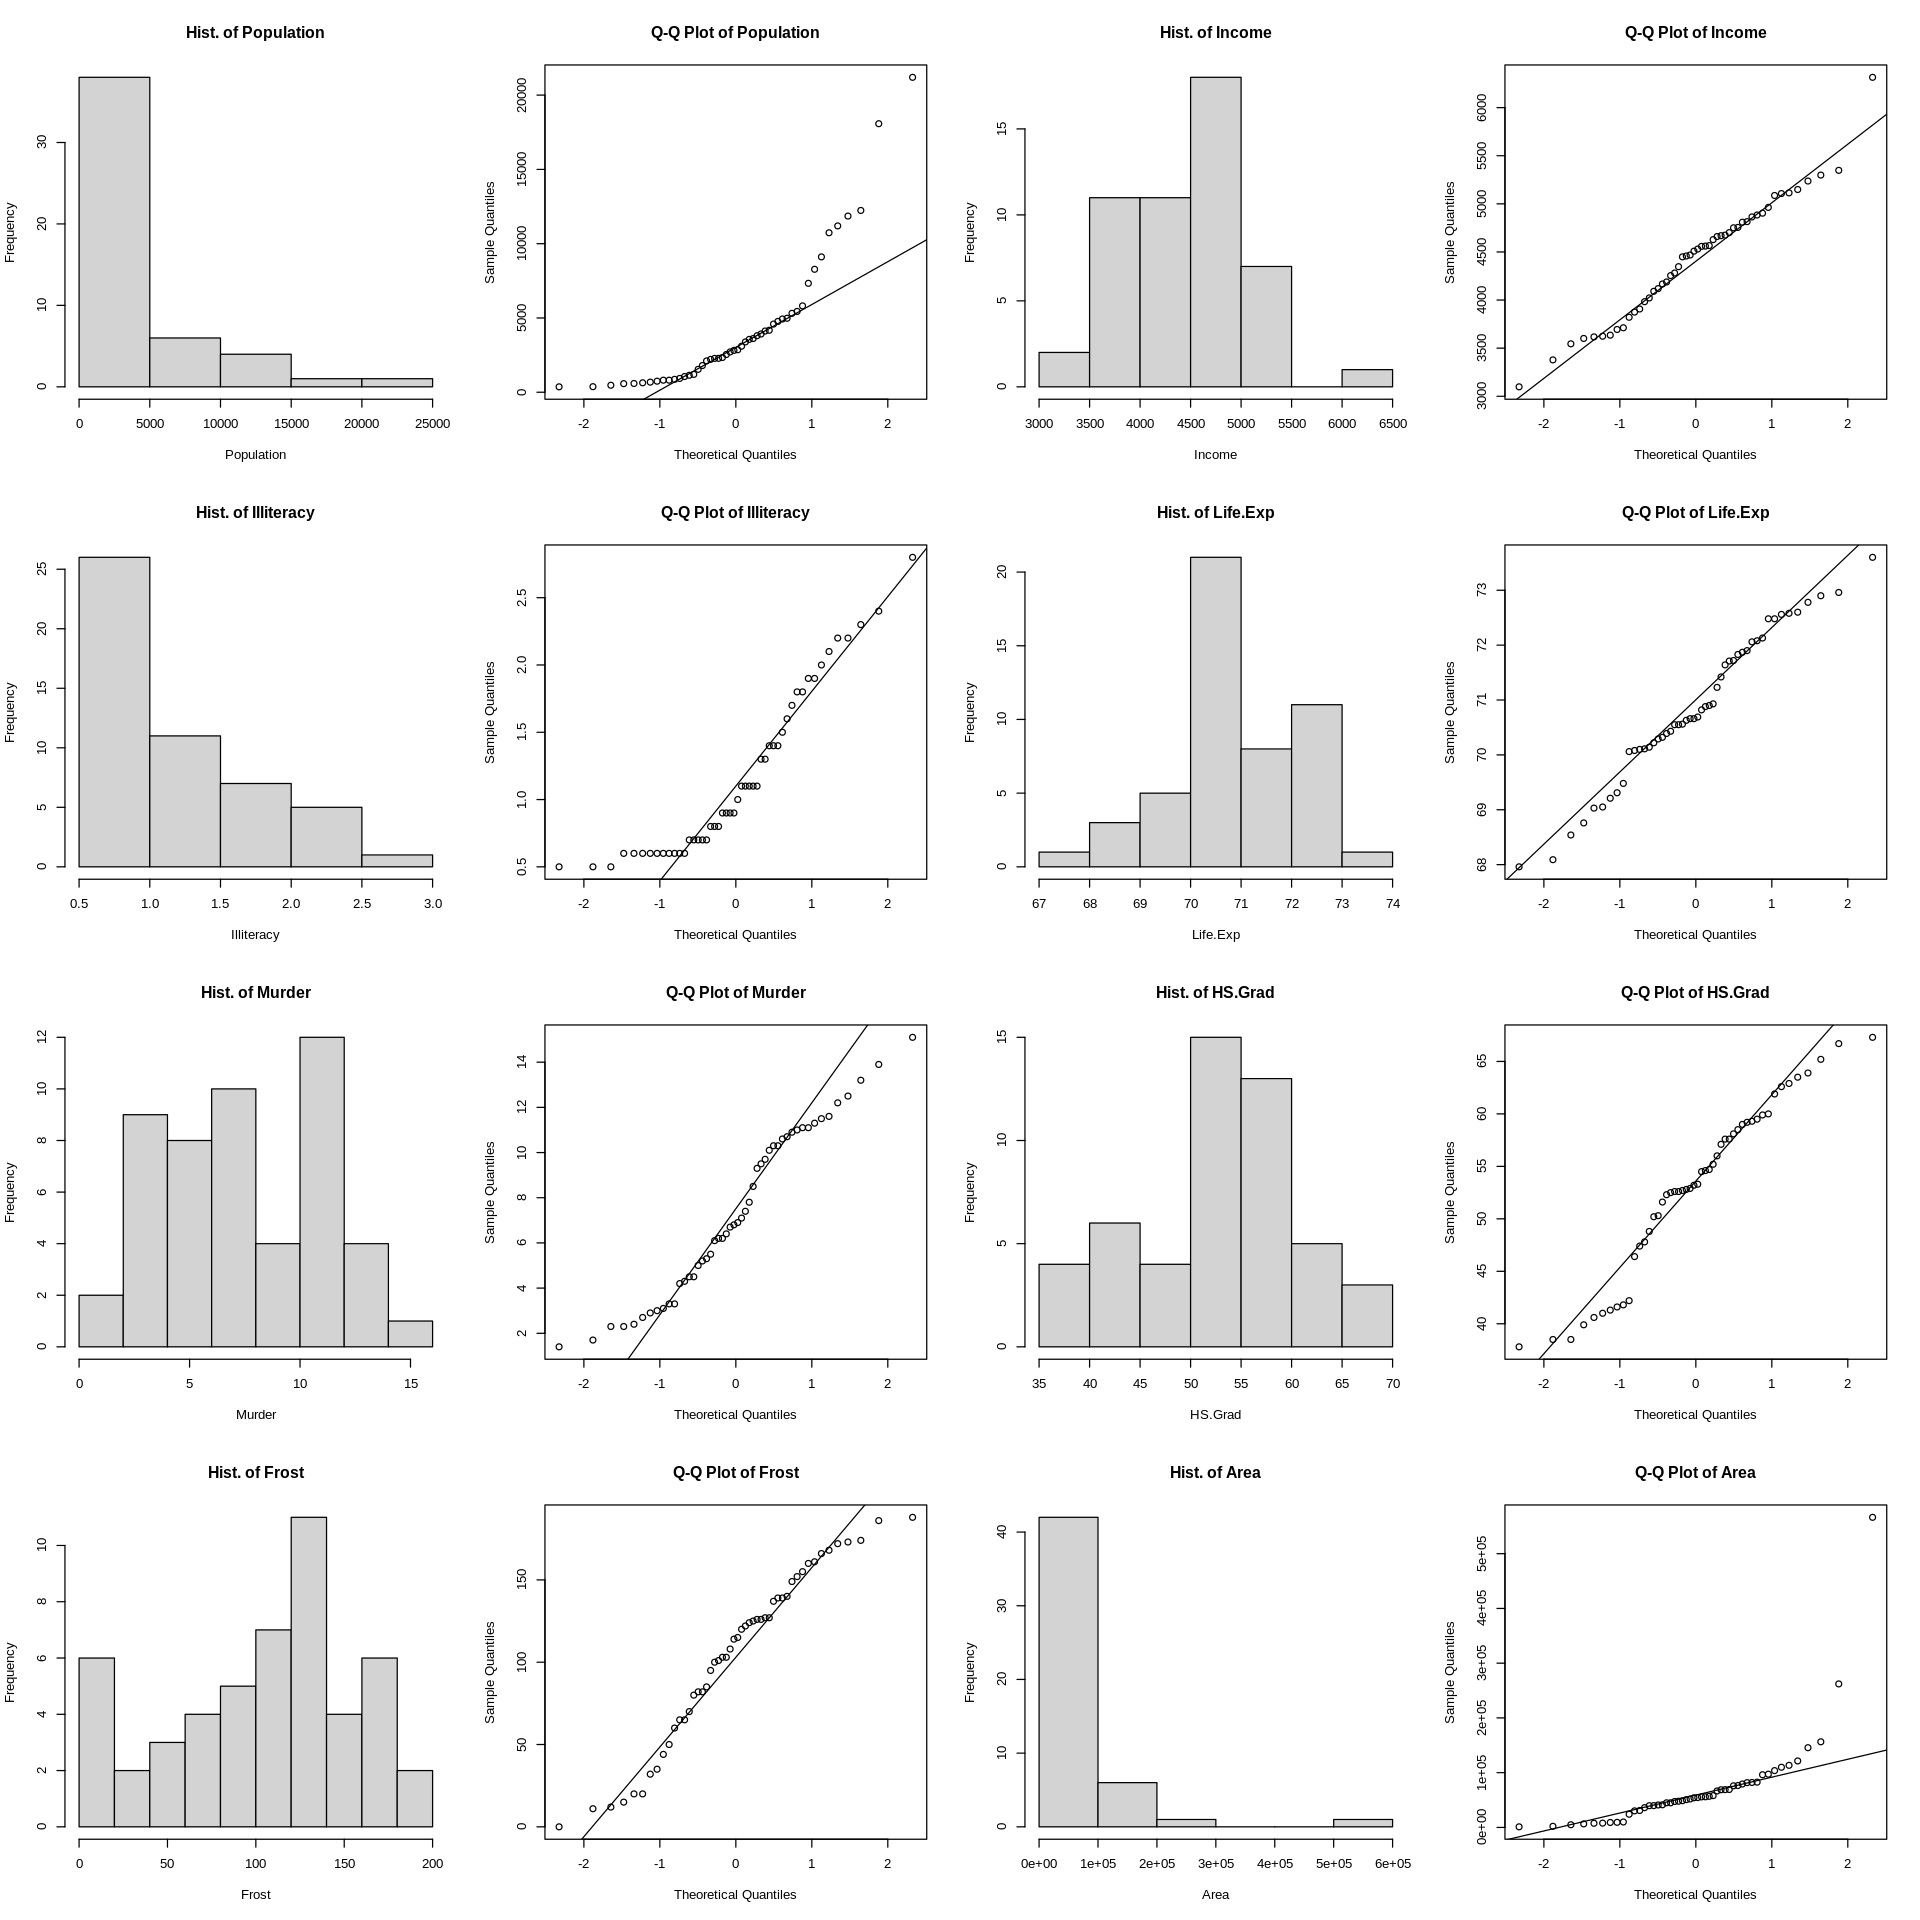

In [9]:
#this is the code for calculating histograms and qq plots
#the library repr is resizing the graphs in the R kernel on the Jupyter notebooks on Google colab
# else they will be too small to be readable

library(repr)
options(repr.plot.width=16, repr.plot.height=16)
a <- colnames(states)[2:9] # Pick up all numeric columns/variables according to the names
par(mfrow = c(4, 4))    # Layout outputs in 4 rows and 4 columns
for (i in 1:length(a)){
  sub = states[a[i]][,1]   # Extract corresponding variable a[i] in sta

  hist(sub, main = paste("Hist. of", a[i], sep = " "), xlab = a[i])
  qqnorm(sub, main = paste("Q-Q Plot of", a[i], sep = " ")) #
  qqline(sub)           # Add a QQ plot line.

   if (i == 1) {
     s.t <- shapiro.test(sub) # Normality test for population
   } else {
     s.t <- rbind(s.t, shapiro.test(sub)) # Bind a new test result to previous row
 }
}

In [10]:
#running this code will allow you to see the different ways R calculates the normal distribution
#for qq plots
help(quantile)

##Examining the Histograms and QQ Plots:
Histogram: Does the histogram approach a normal density curve? If yes, then the variable more likely follows a normal distribution.

Q-Q plot: Do the sample quantiles almost fall into a straight line? If yes, then the variable more likely follows a normal distribution.

We can see that the distributions of Population, Illiteracy, and Area skew to the left. Income and Life.Exp are distributed close to normal

##Shapiro Wilk Test
Next we are going to run the Shapiro-Wilk test.  This tests the normal hypothesis that a variable follows a normal distribution.

In statistics we cannot Prove that something is true, or a difference exists.  So we create a hypothesis that we wish to test, the Ha, or alternative hypothesis.  That there is a difference between our data and what we are testing. The null hypothesis,H0, which states that there is no difference. If we reject the null, we accept the alternative or our HA. You measure this by a p value, which is the probability of obtaining these results, which is usually .05 or lower.

With the Shapiro Wilk, our Ha is that there is a difference between your variable's distribution and a normal variable's distribution.  The null is that there is no difference.  Therefore a small p value means we reject the null, and it is not normal.  We are looking large p-values for normal distributions.

In [11]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
#code for the Shapiro Wilk Test
s.t <- s.t[, 1:2]       # Take the first two columns of shapiro.test result
s.t <- cbind(a, s.t)    # Add variable name for the result
s.t

a          statistic p.value     
s.t Population 0.769992  1.906393e-07
    Income     0.9769037 0.4300105   
    Illiteracy 0.8831491 0.0001396258
    Life.Exp   0.97724   0.4423285   
    Murder     0.9534691 0.04744626  
    HS.Grad    0.9531029 0.04581562  
    Frost      0.9545618 0.05267472  
    Area       0.5717872 7.591835e-11

The shapiro tests show that Income, Life.Exp and Frost are normally distributed with p-values greater than 0.05, while Murder and HS.Grad are almost normally distributed with p-values very close to 0.05. There is no evidence that Population, Illiteracy, and Area having normal distribution.
This is why both visual and statistical checks are important.

In [12]:
counts <- sort(table(states$Region), decreasing = TRUE)  # Number of states in each region
percentages <- 100 * counts / length(states$Region)

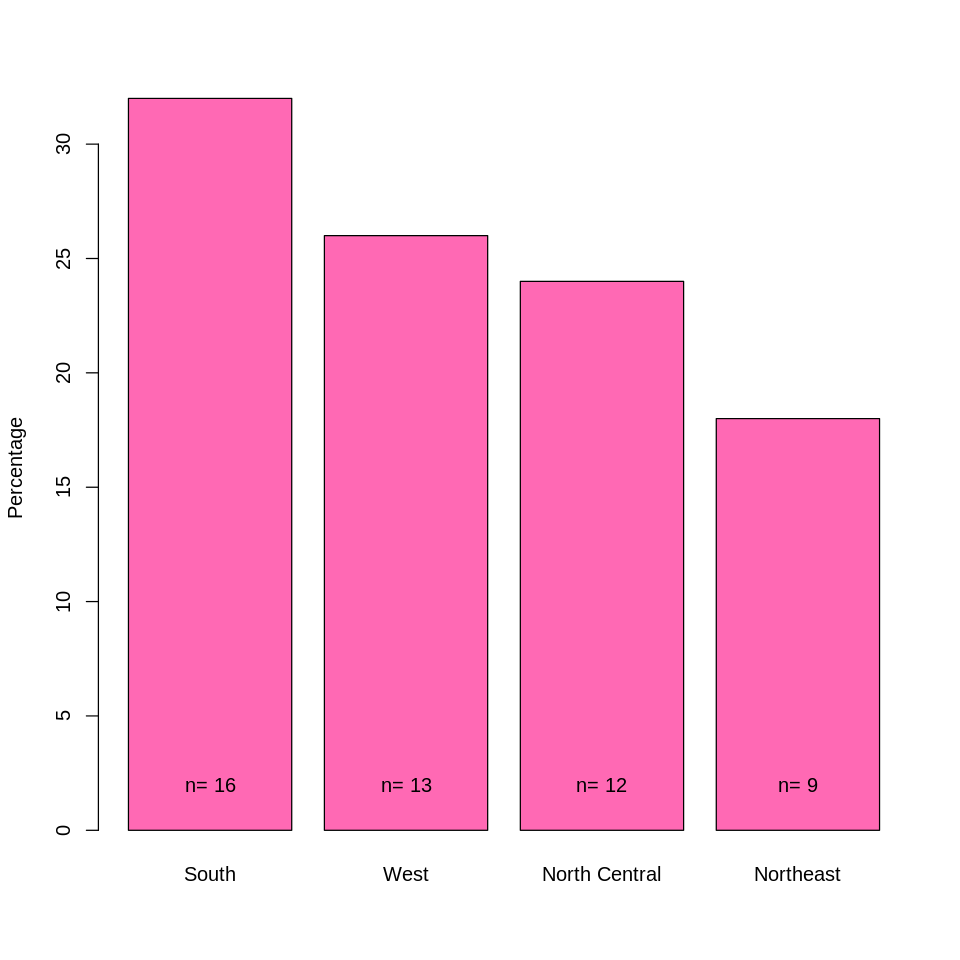

In [13]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
barplot(percentages, ylab = "Percentage", col = "hot pink")
text(x=seq(0.7, 5, 1.2), 2, paste("n=", counts))      # Add count to each bar


###The graph above shows us the breakdown between regions and state distribution.  There are more states in the South and the Northwest has the fewest.

##**Finishing Up!**
To finish up this data exploration we isolate a few key variables and create a visualization to see if there might be a relationship, which we will explore further in the next notebook!

###Here we are creating a subset of the original dataset which includes just Region, Income, Illiteracy, and Murder.  

We are aggregating by State so the numbers reflect the frequency counts of
Income, Illiteracy, and Murder rates by State.

We call this new dataset "tab1" to reflect that this aggregate is in tablular form.




In [14]:
#this is aggregating frequency counts for the variables of Income and Murder by State.
# A new dataframe just for this table was created "tab1" The "(head, 5) command, shows the first 5 rows"
library(dplyr)
# Group by count of multiple columns
tab1 <- states %>% group_by(Region, Income, Illiteracy, Murder) %>%
  summarise(total_count=n(),.groups = 'drop') %>%
  as.data.frame()
 tab1 <-tab1[ -c(5) ]
  head(tab1, 5)

,Region,Income,Illiteracy,Murder
,<fct>,<dbl>,<dbl>,<dbl>
1,Northeast,3694,0.7,2.7
2,Northeast,3907,0.6,5.5
3,Northeast,4281,0.7,3.3
4,Northeast,4449,1.0,6.1
5,Northeast,4558,1.3,2.4


###Below is a Heatmap.  Generally a heatmap shows the relationship between numbers or numeric variables.  It can have categorical variables, such as we do with "Region" here.

So, on the X axis, we have "Region" and on the Y we have "Illiteracy," - our fill is "Murder."  What we can see is that in our 1976 States data, fairly consistently across our Regions, there is a positive relationship between Illiteracy and Murder rates - as one goes up the other does also.  The only Region that shows a difference in this, is the West Region, where the relationship is less clear.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


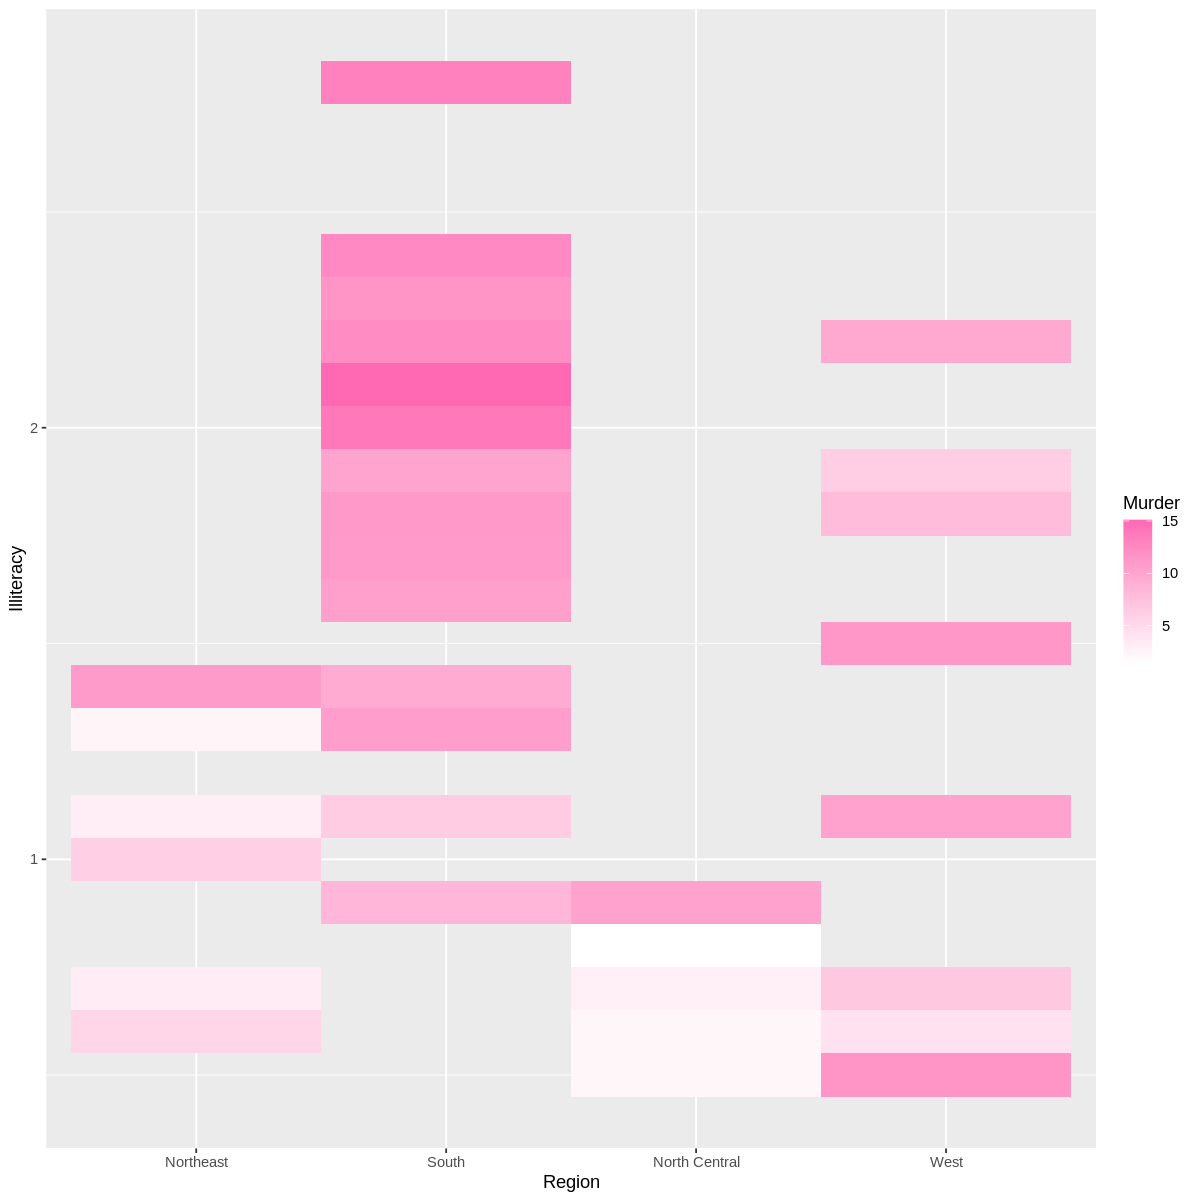

In [15]:
library(tidyverse)
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
ggplot(tab1, aes(x = Region, y = Illiteracy, fill = Murder)) +
  geom_tile() +
  scale_fill_gradient(low="white", high="hot pink")